Now that you have learned the foundations of pandas, this course will give you the chance to apply that knowledge by answering interesting questions about a real dataset! You will explore the **Stanford Open Policing Project** dataset and analyze the impact of gender on police behavior. During the course, you will gain more practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. Analyzing Police Activity with pandas will give you valuable experience analyzing a dataset from start to finish, preparing you for your data science career!

# Preparing the data for analysis

Before beginning your analysis, it is critical that you first examine and clean the dataset, to make working with it a more efficient process. You will practice fixing data types, handling missing values, and dropping columns and rows while learning about the **Stanford Open Policing Project** dataset.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

In [1]:
# Import the pandas library as pd
import pandas as pd

In [5]:
# Read 'police.csv' into a DataFrame named ri and examine the head of the DataFrame
ri = pd.read_csv('../data/40. Final Project/police.csv')
ri.head(20)

FileNotFoundError: [Errno 2] File ../data/40. Final Project/police.csv does not exist: '../data/40. Final Project/police.csv'

In [7]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### Dropping columns
Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the `county_name` column because it only contains missing values, and you'll drop the `state` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [8]:
# Examine the shape of the DataFrame
ri.shape

(91741, 15)

In [9]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [10]:
# Examine the shape of the DataFrame (again)
ri.shape

(91741, 13)

### Finding an incorrect data type
The dtypes attribute of the `ri` DataFrame has been printed for you. Your task is to explore the `ri` DataFrame in the IPython Shell to determine which column's data type should be changed.

In [11]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

### Fixing a data type
We saw in the previous exercise that the `is_arrested` column currently has the object data type. In this exercise, we'll change the data type to `bool`, which is the most suitable type for a column containing `True` and `False` values.

Fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

In [12]:
# Examine the head of the 'is_arrested' column
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [13]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)

In [14]:
# Check the data type of 'is_arrested' (again)
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: bool

### Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: `stop_date` and `stop_time`.

In this exercise, you'll combine these two columns into a single column, and then convert it to `datetime format`. This will enable convenient date-based attributes that we'll use later in the course.

In [15]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [16]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [17]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

### Setting the index
The last step that you'll take in this chapter is to set the `stop_datetime` column as the DataFrame's index. By replacing the default index with a `DatetimeIndex`, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

In [18]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [20]:
# Examine the index
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)

In [21]:
# Examine the columns
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

# Exploring the relationship between gender and policing

Does the gender of a driver have an impact on police behavior during a traffic stop? In this chapter, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

### Examining traffic violations
Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the `violation` column, and then separately express those counts as proportions.

In [22]:
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [23]:
# Express the counts as proportions
ri.violation.value_counts()/ri.violation.value_counts().sum()

Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64

### Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [24]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

In [25]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

In [26]:
# Compute the violations by female drivers (as proportions)
female.violation.value_counts()/female.violation.value_counts().sum()

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [27]:
# Compute the violations by male drivers (as proportions)
male.violation.value_counts()/male.violation.value_counts().sum()

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

### Does gender affect who gets a ticket for speeding?

#### Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the `stop_outcome` column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [29]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

In [30]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

In [42]:
# Compute the stop outcomes for female drivers (as proportions)
female_and_speeding.stop_outcome.value_counts()/female_and_speeding.stop_outcome.value_counts().sum()

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [32]:
# Compute the stop outcomes for male drivers (as proportions)
male_and_speeding.stop_outcome.value_counts()/male_and_speeding.stop_outcome.value_counts().sum()

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

### Does gender affect whose vehicle is searched?

#### Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the `ri` DataFrame that result in a vehicle search, also known as the search rate.

In [33]:
# Check the data type of 'search_conducted'
ri.search_conducted.dtypes

dtype('bool')

In [34]:
# Calculate the search rate by counting the values
ri.search_conducted.value_counts()/ri.search_conducted.value_counts().sum().reset_index()

False    0.963953
True     0.036047
Name: search_conducted, dtype: float64

In [35]:
# Calculate the search rate by taking the mean
ri.search_conducted.mean().reset_index()

0.03604713268876511

#### Comparing search rates by gender
In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a `.groupby()`.

In [36]:
# Calculate the search rate for female drivers
ri[ri.driver_gender=='F'].search_conducted.mean().reset_index()

0.019180617481282074

In [37]:
# Calculate the search rate for male drivers
ri[ri.driver_gender=='M'].search_conducted.mean().reset_index()

0.04542557598546892

In [38]:
# Calculate the search rate for both groups simultaneously
ri.groupby('driver_gender').search_conducted.mean().reset_index()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

#### Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [40]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender','violation']).search_conducted.mean().reset_index()

,driver_gender,violation,search_conducted
0,F,Equipment,0.039984
1,F,Moving violation,0.039257
2,F,Other,0.041018
3,F,Registration/plates,0.054924
4,F,Seat belt,0.017301
5,F,Speeding,0.008309
6,M,Equipment,0.071496
7,M,Moving violation,0.061524
8,M,Other,0.046191
9,M,Registration/plates,0.108802


In [43]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation','driver_gender']).search_conducted.mean().reset_index()

,violation,driver_gender,search_conducted
0,Equipment,F,0.039984
1,Equipment,M,0.071496
2,Moving violation,F,0.039257
3,Moving violation,M,0.061524
4,Other,F,0.041018
5,Other,M,0.046191
6,Registration/plates,F,0.054924
7,Registration/plates,M,0.108802
8,Seat belt,F,0.017301
9,Seat belt,M,0.035119


### Does gender affect who is frisked during a search?
#### Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

In [45]:
# Count the 'search_type' values
ri.search_type.value_counts().reset_index()

,index,search_type
0,Incident to Arrest,1290
1,Probable Cause,924
2,Inventory,219
3,Reasonable Suspicion,214
4,Protective Frisk,164
5,"Incident to Arrest,Inventory",123
6,"Incident to Arrest,Probable Cause",100
7,"Probable Cause,Reasonable Suspicion",54
8,"Incident to Arrest,Inventory,Probable Cause",35
9,"Probable Cause,Protective Frisk",35


In [46]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [47]:
# Check the data type of 'frisk'
ri.frisk.dtypes

dtype('bool')

In [48]:
# Take the sum of 'frisk'
ri.frisk.sum()

303

### Comparing frisk rates by gender
In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [49]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted==True]

In [50]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()

0.09162382824312065

In [52]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender')['frisk'].mean().reset_index()

,driver_gender,frisk
0,F,0.074561
1,M,0.094353


# Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Does time of day affect arrest rate?
#### Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the `ri` DataFrame. Then, you'll calculate the hourly arrest rate by using the `hour` attribute of the index. The `hour` ranges from 0 to 23, in which:

- 0 = midnight
- 12 = noon
- 23 = 11 PM

In [53]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.09025408486936048

In [55]:
# Calculate the hourly arrest rate
ri.groupby(ri.index.hour)['is_arrested'].mean().reset_index()

,stop_datetime,is_arrested
0,0,0.121206
1,1,0.144250
2,2,0.144120
3,3,0.148370
4,4,0.179310
5,5,0.178899
6,6,0.043614
7,7,0.053497
8,8,0.073591
9,9,0.070199


In [58]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

### Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

In [56]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

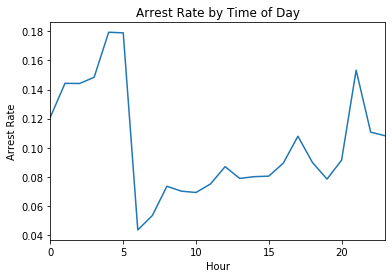

In [60]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Are drug-related stops on the rise?
#### Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

In [62]:
# Calculate the annual rate of drug-related stops
ri.drugs_related_stop.resample('A').mean().reset_index()

,stop_datetime,drugs_related_stop
0,2005-12-31,0.006390
1,2006-12-31,0.006913
2,2007-12-31,0.007520
3,2008-12-31,0.006998
4,2009-12-31,0.009079
5,2010-12-31,0.009407
6,2011-12-31,0.009035
7,2012-12-31,0.009388
8,2013-12-31,0.012283
9,2014-12-31,0.013280


In [63]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

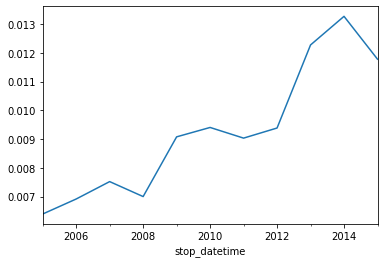

In [64]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

### Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

In [65]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [66]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

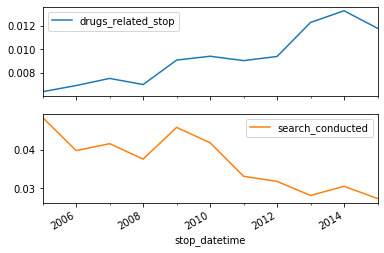

In [67]:
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

## What violations are caught in each district?

#### Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [68]:
# Create a frequency table of districts and violations
pd.crosstab(ri.district,ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [69]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district,ri.violation)

In [70]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323


In [71]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

### Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

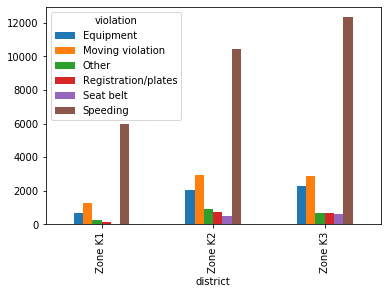

In [72]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

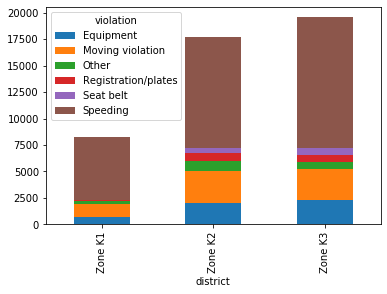

In [73]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(stacked=True,kind='bar')

# Display the plot
plt.show()

### How long might you be stopped for a violation?
##### Converting stop durations to numbers
In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

- Convert `'0-15 Min'` to `8`
- Convert `'16-30 Min'` to `23`
- Convert `'30+ Min'` to `45`

In [74]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [75]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, 
           '16-30 Min': 23,
           '30+ Min': 45}

In [76]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [77]:
# Print the unique values in 'stop_minutes'
ri['stop_minutes'].unique()

array([ 8., 23., nan, 45.])

### Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the `violation` column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

In [78]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
ri.groupby('violation_raw').stop_minutes.mean().reset_index()

,violation_raw,stop_minutes
0,APB,17.967033
1,Call for Service,22.140805
2,Equipment/Inspection Violation,11.445340
3,Motorist Assist/Courtesy,17.741463
4,Other Traffic Violation,13.844490
5,Registration Violation,13.736970
6,Seatbelt Violation,9.662815
7,Special Detail/Directed Patrol,15.123632
8,Speeding,10.581509
9,Suspicious Person,14.910714


In [79]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

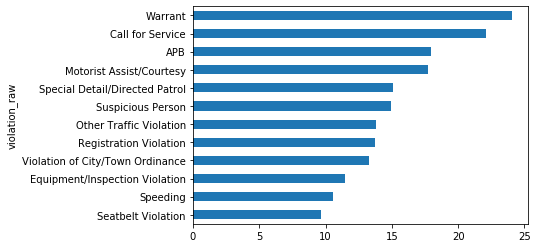

In [80]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# Analyzing the effect of weather on policing

In this chapter, you will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. You will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills.

### Plotting the temperature
In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

In [86]:
# Read 'weather.csv' into a DataFrame named 'weather' and show the first values
weather = pd.read_csv('../data/40. Final Project/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [84]:
# Describe the temperature columns
weather[['TMIN','TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


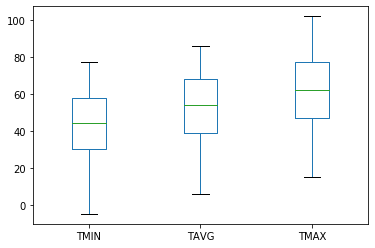

In [85]:
# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

### Plotting the temperature difference
In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

In [87]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX']-weather['TMIN']

In [90]:
# Describe the 'TDIFF' column
weather.TDIFF.describe().reset_index()

,index,TDIFF
0,count,4017.000000
1,mean,17.784167
2,std,6.350720
3,min,2.000000
4,25%,14.000000
5,50%,18.000000
6,75%,22.000000
7,max,43.000000


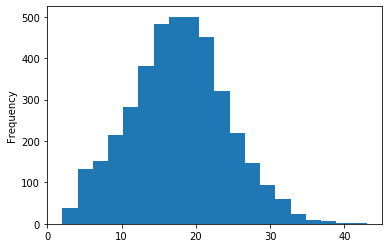

In [91]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

## Categorizing the weather

#### Counting bad weather conditions
The `weather` DataFrame contains 20 columns that start with `'WT'`, each of which represents a bad weather condition. For example:

- `WT05` indicates "Hail"
- `WT11` indicates "High or damaging winds"
- `WT17` indicates "Freezing rain"

For every row in the dataset, each `WT` column contains either a `1` (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of `1` values in each row.

In [92]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

In [93]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

In [94]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

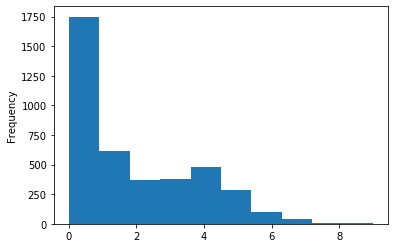

In [95]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

### Rating the weather conditions
In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert `0` to `'good'`
- Convert `1` through `4` to `'bad'`
- Convert `5` through `9` to `'worse'`

In [96]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [97]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

In [98]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [99]:
# Count the unique values in 'rating'
weather['rating'].value_counts().reset_index()

,index,rating
0,bad,1836
1,good,1749
2,worse,432


### Changing the data type to category
Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

In [100]:
# Create a list of weather ratings in logical order
cats = ['good','bad','worse']

In [104]:
# Change the data type of 'rating' to category
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather.rating.astype(cat_dtype)

In [105]:
# Examine the head of 'rating'
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

## Merging datasets
#### Preparing the DataFrames
In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

- With the `ri` DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.
- With the `weather` DataFrame, you'll select the `DAT`E and `rating `columns and put them in a new DataFrame.

In [106]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

In [107]:
# Examine the head of 'ri'
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8.0
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23.0
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8.0


In [108]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

In [109]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


### Merging the DataFrames
In this exercise, you'll merge the `ri` and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

In [110]:
# Examine the shape of 'ri'
ri.shape

(91741, 16)

In [111]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [112]:
# Examine the shape of 'ri_weather'
ri_weather.shape

(91741, 18)

In [113]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

## Does weather affect the arrest rate?

### Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Find out below!

- First, you'll calculate the overall arrest rate.
- Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
- Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, `good < bad < worse`, they will be sorted that way in the results.

In [114]:
# Calculate the overall arrest rate
ri_weather.is_arrested.mean()

0.09025408486936048

In [115]:
# Calculate the arrest rate for each 'rating'
ri_weather.groupby('rating')['is_arrested'].mean().reset_index()

,rating,is_arrested
0,good,0.086842
1,bad,0.090479
2,worse,0.106527


In [117]:
# Calculate the arrest rate for each 'violation' and 'rating'
ri_weather.groupby(['violation','rating'])['is_arrested'].mean().reset_index()

,violation,rating,is_arrested
0,Equipment,good,0.058995
1,Equipment,bad,0.066311
2,Equipment,worse,0.097357
3,Moving violation,good,0.056227
4,Moving violation,bad,0.058050
5,Moving violation,worse,0.065860
6,Other,good,0.076923
7,Other,bad,0.087443
8,Other,worse,0.062893
9,Registration/plates,good,0.081574


## Selecting from a multi-indexed Series
The output of a single `.groupby()` operation on multiple columns is a Series with a `MultiIndex`. Working with this type of object is similar to working with a DataFrame:

- The outer index level is like the DataFrame rows.
- The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the `.loc[]` accessor.

In [118]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [121]:
# Print the 'arrest_rate' Series
arrest_rate.head().reset_index()

,violation,rating,is_arrested
0,Equipment,good,0.058995
1,Equipment,bad,0.066311
2,Equipment,worse,0.097357
3,Moving violation,good,0.056227
4,Moving violation,bad,0.058050


In [122]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation','bad']

0.05804964058049641

In [123]:
# Print the arrest rates for speeding violations in all three weather conditions
arrest_rate.loc['Speeding']

rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64

## Reshaping the arrest rate data
In this exercise, you'll start by reshaping the `arrest_rate` Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [124]:
# Unstack the 'arrest_rate' Series into a DataFrame
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.058995,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076923,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013404,0.013314,0.016886


In [125]:
# Create the same DataFrame using a pivot table
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.058995,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076923,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013404,0.013314,0.016886
